In [11]:
import os

from tennis_tracker.download_data.extract_keypoints import read_json_file

FILE_PATH = "/Users/derek/Desktop/tennis_tracker/tennis_tracker/ball_tracking/clean_labels_V010.json"

data = read_json_file(FILE_PATH)

key1 = list(data.keys())[1]
actual_key = key1.split("/tennis_tracker/")[1]
actual_path = os.path.join("/Users/derek/Desktop/tennis_tracker", actual_key).replace(" &", "&")

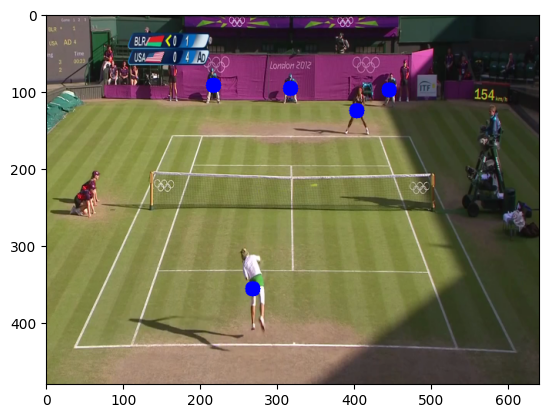

In [12]:
import cv2
import matplotlib.pyplot as plt

def split_box(box):
    split_box = box.split(" ")[1:]
    split_box = [float(x) for x in split_box]
    return split_box


boxes = [split_box(box) for box in data[key1]["boxes"]]
image = cv2.imread(actual_path)
image = cv2.resize(image, (640, 480))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_height, image_width, _ = image.shape

for box in boxes:
    box[0] = int(box[0] * image_width)
    box[1] = int(box[1] * image_height)
    box[2] = int(box[2] * image_width)
    box[3] = int(box[3] * image_height)
    cv2.circle(image, (box[0], box[1]), 10, (0, 0, 255), -1)
plt.imshow(image)
plt.show()

In [13]:
data[key1]['boxes']

['0 0.419010728597641 0.743503987789154 0.053754065185785294 0.22855763137340546',
 '0 0.4960790276527405 0.20045727491378784 0.0295261200517416 0.08222109079360962',
 '0 0.6310803890228271 0.2611978352069855 0.04993440583348274 0.13131356239318848',
 '0 0.6966747641563416 0.20496128499507904 0.03072456270456314 0.09270935505628586',
 '0 0.3391381502151489 0.19338594377040863 0.029316633939743042 0.097060926258564']

In [14]:
data[key1]["transformed_coords"]

[[240.75392150878906, 729.8146362304688],
 [202.25650024414062, 317.8502502441406],
 [238.97247314453125, 441.62762451171875],
 [245.49534606933594, 334.4646301269531],
 [167.84217834472656, 318.7769775390625]]

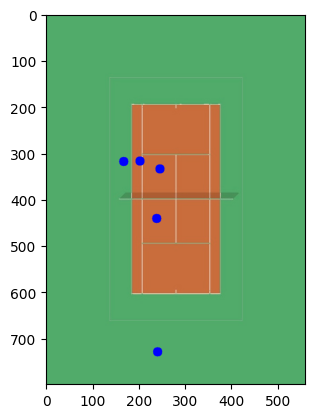

In [16]:
court_image = cv2.imread("/Users/derek/Desktop/tennis_tracker/tennis_tracker/player_location/padded_court.jpg")
for point in data[key1]["transformed_coords"]:
    cv2.circle(court_image, (int(point[0]), int(point[1])), 10, (0, 0, 255), -1)

plt.imshow(court_image)
plt.show()